# Requirements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Data

Dataset used: https://archive.ics.uci.edu/dataset/342/mice+protein+expression

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

In [ ]:
df = pd.read_excel('Data_Cortex_Nuclear.xls')

In [ ]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [ ]:
df.shape

(1080, 82)

missing values

In [ ]:
df.isna().sum()

,0
MouseID,0
DYRK1A_N,3
ITSN1_N,3
BDNF_N,3
NR1_N,3
...,...
CaNA_N,0
Genotype,0
Treatment,0
Behavior,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(552, 82)

dropping the attributes with categorical values and splitting the data

In [ ]:
X = df.drop(["MouseID", "Genotype", "Treatment", "Behavior", "class"], axis=1)
Y = df["class"]

In [ ]:
classes = Y.unique()
num_classes = len(classes)

standardization of the data (in pca the features with larger magnitudes will dominate the principal components — not because they’re more important, but simply because their variance is numerically larger)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 1.43670714,  1.12612827,  1.70538327, ..., -0.88379591,
        -1.10934869,  0.76435059],
       [ 1.23272374,  1.19886098,  1.38110357, ..., -0.48484616,
        -1.06091877,  0.564395  ],
       [ 1.36101446,  1.25861003,  1.60590551, ..., -0.49989147,
        -1.12337285,  0.59441758],
       ...,
       [-0.43822922, -0.33177247,  0.8679738 , ...,  0.11519958,
         1.09360731, -0.84145241],
       [-0.42047396, -0.39246637,  1.41431154, ...,  0.59325937,
         1.66857713, -0.74286123],
       [-0.30217087, -0.38482837,  1.33778207, ...,  1.16290415,
         1.06721069, -0.89943512]])

# PCA

using PCA to visualize the data in 2d

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

In [ ]:
pca_data

array([[ 6.2682903 , -3.48579712],
       [ 5.8254835 , -2.97455076],
       [ 6.87728833, -3.02751442],
       ...,
       [ 6.35244088,  4.41514934],
       [ 7.5705626 ,  5.22644708],
       [ 8.22955899,  5.51307806]])

In [ ]:
pca_data.shape

(552, 2)

In [ ]:
pca_df = pd.DataFrame(data=pca_data
                           , columns=['principal component 1', 'principal component 2'])
y_df = pd.DataFrame(data=Y, columns=['class'])

In [ ]:
y_df.index = range(0,552)

In [ ]:
pca_y_df = pd.concat([pca_df, y_df], axis=1, join='outer')

In [ ]:
pca_y_df

,principal component 1,principal component 2,class
0,6.268290,-3.485797,c-CS-m
1,5.825484,-2.974551,c-CS-m
2,6.877288,-3.027514,c-CS-m
3,2.378703,-3.531468,c-CS-m
4,2.890213,-2.859155,c-CS-m
...,...,...,...
547,7.781784,4.131977,t-SC-s
548,8.671225,4.439218,t-SC-s
549,6.352441,4.415149,t-SC-s
550,7.570563,5.226447,t-SC-s


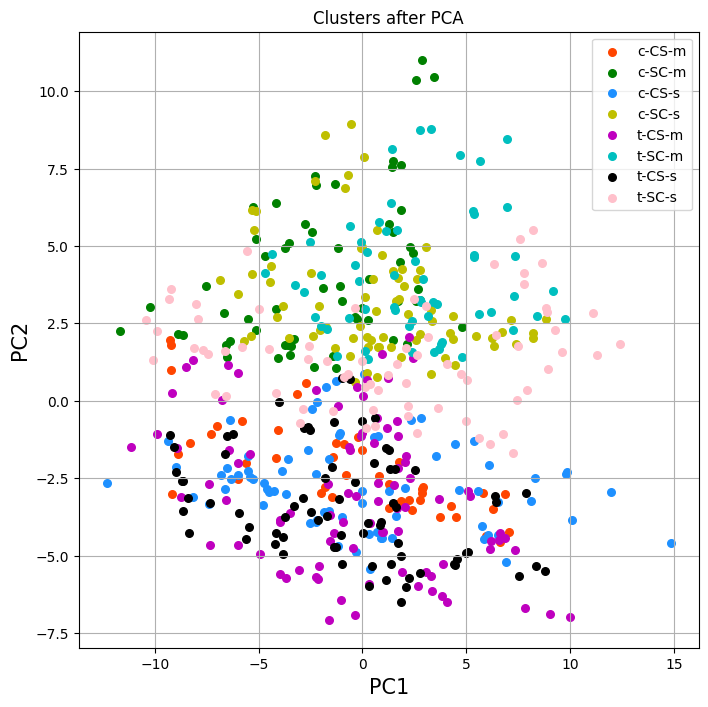

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

colors = ['orangered', 'g', 'dodgerblue', 'y', 'm', 'c', 'k', 'pink']
for target, color in zip(classes, colors):
    points_to_keep = pca_y_df['class'] == target
    ax.scatter(pca_y_df.loc[points_to_keep, 'principal component 1']
               , pca_y_df.loc[points_to_keep, 'principal component 2']
               , c=color
               , s=30)

ax.legend(classes)
ax.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters after PCA')
plt.show()

<Axes: >

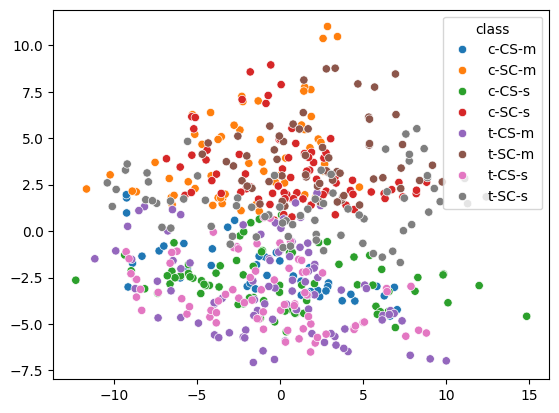

In [ ]:
sns.scatterplot(x = pca_data[:, 0], y = pca_data[:, 1], hue = Y)

# Clustering

Gaussian Mixture Models

In [ ]:
# full - each component has its own full covariance matrix
gmm_full = GaussianMixture(covariance_type='full', n_components=8, random_state=0)
gmm_full.fit(X_scaled)
gmm_full_pred = gmm_full.predict(X_scaled)

In [ ]:
# tied - all components share the same full covariance matrix
gmm_tied = GaussianMixture(covariance_type='tied', n_components=8, random_state=0)
gmm_tied.fit(X_scaled)
gmm_tied_pred = gmm_tied.predict(X_scaled)

In [ ]:
# diagonal - each component has its own diagonal covariance matrix
gmm_diag = GaussianMixture(covariance_type='diag', n_components=8, random_state=0)
gmm_diag.fit(X_scaled)
gmm_diag_pred = gmm_diag.predict(X_scaled)

In [ ]:
# spherical - each component has a single variance (equal in all directions)
gmm_spherical = GaussianMixture(covariance_type='spherical', n_components=8, random_state=0)
gmm_spherical.fit(X_scaled)
gmm_spherical_pred = gmm_spherical.predict(X_scaled)

bayesian information criterion
(balances model fit and complexity)

In [ ]:
bic_full = gmm_full.bic(X_scaled)
bic_tied = gmm_tied.bic(X_scaled)
bic_diag = gmm_diag.bic(X_scaled)
bic_spherical = gmm_spherical.bic(X_scaled)

In [ ]:
print(f"full {bic_full}")
print(f"tied {bic_tied}")
print(f"diagonal {bic_diag}")
print(f"spherical {bic_spherical}")

full 65681.5960816183
tied 47947.62782320921
diagonal 94611.19609598837
spherical 98019.36562914825


K-means

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans_pred = kmeans.fit_predict(X_scaled)

# Visualizations

Text(0.5, 1.0, 'GMM spherical')

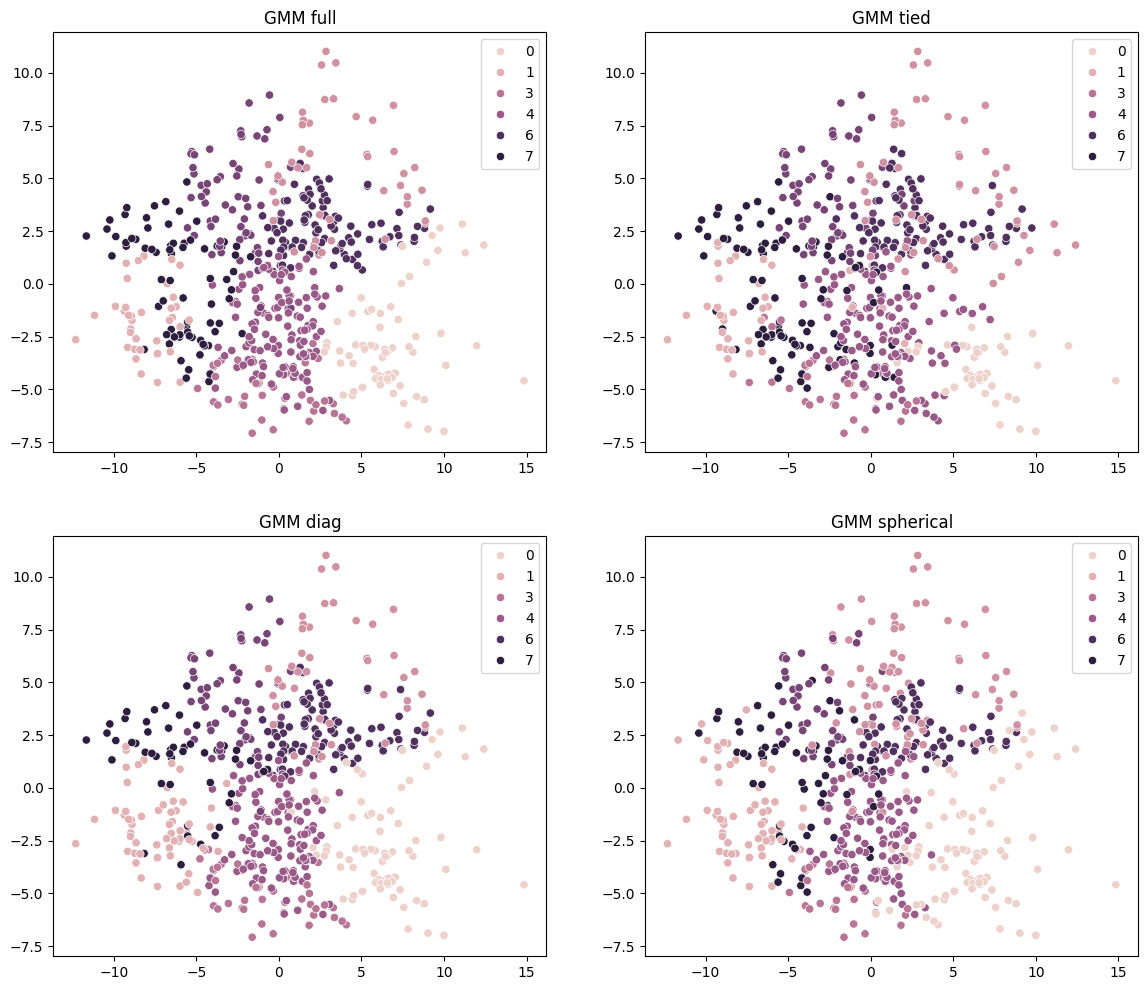

In [ ]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x = pca_data[:, 0], y = pca_data[:, 1], hue = gmm_full_pred)
plt.title('GMM full')

plt.subplot(2, 2, 2)
sns.scatterplot(x = pca_data[:, 0], y = pca_data[:, 1], hue = gmm_tied_pred)
plt.title('GMM tied')

plt.subplot(2, 2, 3)
sns.scatterplot(x = pca_data[:, 0], y = pca_data[:, 1], hue = gmm_diag_pred)
plt.title('GMM diag')

plt.subplot(2, 2, 4)
sns.scatterplot(x = pca_data[:, 0], y = pca_data[:, 1], hue = gmm_spherical_pred)
plt.title('GMM spherical')

Text(0.5, 1.0, 'k-means')

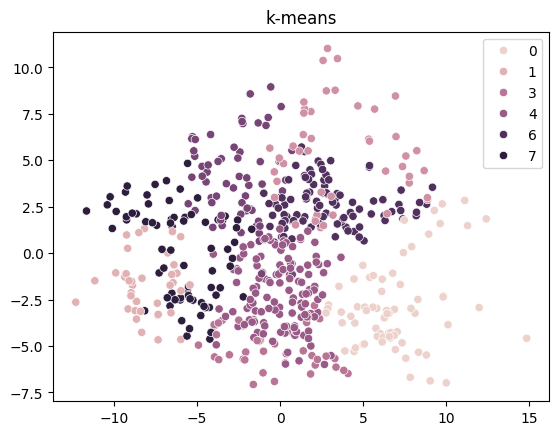

In [ ]:
sns.scatterplot(x = pca_data[:, 0], y = pca_data[:, 1], hue = kmeans_pred)
plt.title('k-means')

<Axes: >

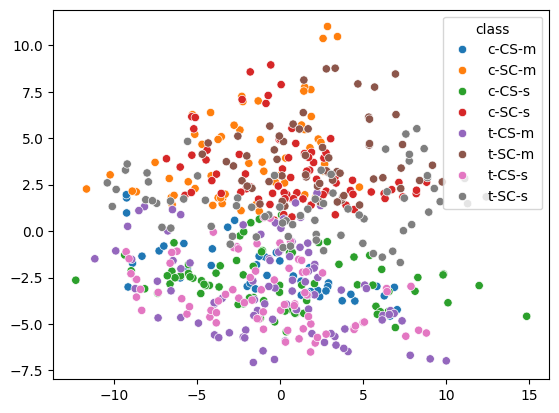

In [ ]:
sns.scatterplot(x = pca_data[:, 0], y = pca_data[:, 1], hue = Y)